In [441]:
## Hello! My name is João and I am quite the movie entusiast! I've watched a lot of movies, from all sorts of genres, 
## and I have always been curious on how the platforms dedicated to them actually created recommendations for the users 
## based on the movies they liked! With that in mind, I'll try to
## create an algorhytm myself that performs this, so buckle up!

In [ ]:
## First, let's import the libraries we need:
import pandas as pd 
import seaborn as sns

In [21]:
## Now, let's import de dataset we are working with:
df = pd.read_csv('u.data')
movies = pd.read_csv('Movie_Id_Titles')

In [22]:
## Checking out the structure of table df:
df.head()

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116


In [23]:
## We need to make a few adjustments to it:
column_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('u.data',names = column_names, sep='\t')

In [24]:
## Checking it out again, now it is more easy to work with:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [25]:
## Let's check out movies talbe now:
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [26]:
## Let's add column 'title' from Movies table to df, based on common column 'item_id':
df = pd.merge(df,movies,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [27]:
## Let's do a bit of data exploration now! Let's check out the mean ratings of all movies:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending=False))
ratings.head()

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [28]:
## Let's add a column to rating table for the number of ratings it got:
ratings['number_ratings']=df.groupby('title')['rating'].count()
ratings.head()

,rating,number_ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


In [29]:
## Let's check out the movies that had more number of ratings:
ratings['number_ratings'].sort_values(ascending=False)

title
Star Wars (1977)                               584
Contact (1997)                                 509
Fargo (1996)                                   508
Return of the Jedi (1983)                      507
Liar Liar (1997)                               485
                                              ... 
Land and Freedom (Tierra y libertad) (1995)      1
Big One, The (1997)                              1
Cyclo (1995)                                     1
Mirage (1995)                                    1
Crude Oasis, The (1995)                          1
Name: number_ratings, Length: 1664, dtype: int64

<Axes: >

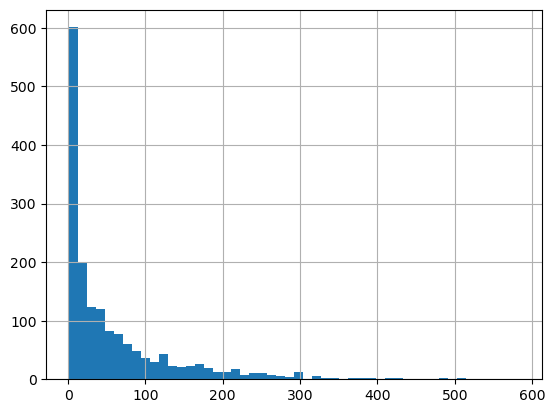

In [30]:
## Let's add a more visual element to it:
ratings['number_ratings'].hist(bins=50)

In [31]:
## As you can see, if you were to group the movies by how many ratings they got, 
## the groups of few ratings would be much more representative 
## than groups with high number of ratings, which lets us know that this dataset is quite large,
## or at least that known films are not the major part of this dataset

<Axes: >

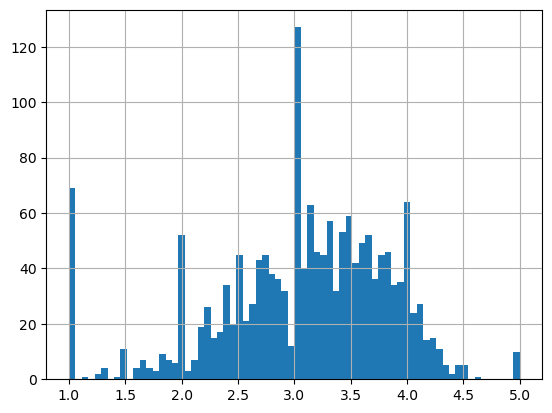

In [32]:
## Let's also check the distribution of ratings:
ratings['rating'].hist(bins=70)

In [33]:
## Like you can see it follows a normal distribution, with the average scores being, in general, most representative, 
## although rating 1 is more frequent than expected

In [34]:
## Let's check out the schema of our table again. There are a few alterations we need to make
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [337]:
## We need to pivot this table. Basically, what we need is to have user_id as the index, movie title as column and rating as values:
movie_table = df.pivot_table(index='user_id',columns='title',values='rating')
movie_table.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
## Like this! Basically what we needed is to have ratings of the ratings by user and by movie, which is what we got

In [376]:
## This is the function that will be used to return movie recommendations! Basically, the criteria I've set is having a minimal value
## of 0.7 correlation and the movie need to have at least 20 ratings, for its average rating to be relevant.

def movie_recomendations(movie_title, min_ratings=100):
    if movie_title not in movie_table.columns:
        return f"O filme '{movie_title}' não está presente na lista!"

    selected_movie = movie_table[movie_title]
    similar_movies = movie_table.corrwith(selected_movie)
    corr_movies = pd.DataFrame(similar_movies, columns = ['Correlation'])
    corr_movies.dropna(inplace=True)
    corr_movies = corr_movies.join(ratings['number_ratings'])
    recomendations = corr_movies[
    (corr_movies['Correlation'] > 0.7) &
    (corr_movies['number_ratings'] >= 40) 
    ]
    
    return recomendations

In [364]:
## So let's go through it step by step. First what we did was to have an applied version of our pivot table to our selected movie:
movie_title="12 Angry Men (1957)"
selected_movie

user_id
0      NaN
1      5.0
2      NaN
3      NaN
4      NaN
      ... 
939    NaN
940    NaN
941    NaN
942    NaN
943    NaN
Name: 12 Angry Men (1957), Length: 944, dtype: float64

In [365]:
## Then we correlate the whole table with our selected movie. Keep in mind that the values in the pivot table are the ratings 
## of each movie by user:

similar_movies = movie_table.corrwith(selected_movie)
similar_movies

C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


title
'Til There Was You (1997)               -0.500000
1-900 (1994)                                  NaN
101 Dalmatians (1996)                   -0.049890
12 Angry Men (1957)                      1.000000
187 (1997)                               0.666667
                                           ...   
Young Guns II (1990)                    -0.361961
Young Poisoner's Handbook, The (1995)    0.144338
Zeus and Roxanne (1997)                  1.000000
unknown                                  1.000000
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [366]:
## Now we can get rid of null values, which essentially mean that there were no common users 
## that saw both our selected movie and tge movie in the table:

corr_movies = pd.DataFrame(similar_movies,columns=['Correlation'])
corr_movies.dropna(inplace=True)
corr_movies

,Correlation
title,
'Til There Was You (1997),-0.500000
101 Dalmatians (1996),-0.049890
12 Angry Men (1957),1.000000
187 (1997),0.666667
2 Days in the Valley (1996),0.256625
...,...
Young Guns (1988),0.068944
Young Guns II (1990),-0.361961
"Young Poisoner's Handbook, The (1995)",0.144338


In [367]:
## Now we can join the number of ratings for each movie, since it is also a selected metric for our algorhytm:

corr_movies = corr_movies.join(ratings['number_ratings'])
corr_movies

,Correlation,number_ratings
title,,
'Til There Was You (1997),-0.500000,9
101 Dalmatians (1996),-0.049890,109
12 Angry Men (1957),1.000000,125
187 (1997),0.666667,41
2 Days in the Valley (1996),0.256625,93
...,...,...
Young Guns (1988),0.068944,101
Young Guns II (1990),-0.361961,44
"Young Poisoner's Handbook, The (1995)",0.144338,41


In [368]:
## Now let's check the movies recomended by our function!

movie_recomendations(movie_title)

C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Correlation,number_ratings
title,,
12 Angry Men (1957),1.000000,125
Addicted to Love (1997),0.867722,54
Booty Call (1997),1.000000,48
Eddie (1996),0.720577,40
Fallen (1998),0.866025,41
Moll Flanders (1996),0.820686,42
Mouse Hunt (1997),0.801193,44
Screamers (1995),1.000000,46
When We Were Kings (1996),0.881917,44


In [318]:
## We can see right away that there is something off about our recomendations, 
## since there are two movies that have a perfect 1 correlation value.
## So let's check that out:

movie_table[
(movie_table['12 Angry Men (1957)'].notnull()) &
(movie_table['Booty Call (1997)'].notnull()) 
][['Booty Call (1997)','12 Angry Men (1957)']]

title,Booty Call (1997),12 Angry Men (1957)
user_id,,
16,3.0,5.0
537,1.0,4.0


In [398]:
## So right away we can see that two films that have a perfect correlation 
## relation have very different ratings by common user.
## So we might have to adjust our parameters. Let's loose a bit on the 
## number of ratings metric but tighten a bit with a new 
## metric: for a movie to be recommended, that movie and our selected movie 
##need to have at least 8 users that watched both movies. Let's see what changes!

In [403]:
def movie_recomendations(movie_title, min_ratings=100):
    if movie_title not in movie_table.columns:
        return f"O filme '{movie_title}' não está presente na lista!"

    selected_movie = movie_table[movie_title]
    similar_movies = movie_table.corrwith(selected_movie)
    corr_movies = pd.DataFrame(similar_movies, columns = ['Correlation'])
    corr_movies = corr_movies.dropna()
    corr_movies = corr_movies.join(ratings['number_ratings'])
    common_users = movie_table.notnull().astype(int).T.dot(movie_table.notnull().astype(int))
    common_users_movie = common_users[movie_title]
    corr_movies['common_users'] = common_users_movie
    recomendations = corr_movies[
    (corr_movies['Correlation']>0.7
    (corr_movies['number_ratings'] >= 20) &
    (corr_movies['common_users'] >=8 )
    ]
    
    return recomendations

In [394]:
movie_title='12 Angry Men (1957)'

In [397]:
movie_recomendations(movie_title)['Correlation'].sort_values(ascending=False)

C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


title
12 Angry Men (1957)                                                     1.000000
Paris Is Burning (1990)                                                 0.822724
Moll Flanders (1996)                                                    0.820686
Down by Law (1986)                                                      0.807207
Get on the Bus (1996)                                                   0.806427
Mouse Hunt (1997)                                                       0.801193
Vanya on 42nd Street (1994)                                             0.800417
Affair to Remember, An (1957)                                           0.794719
Once Were Warriors (1994)                                               0.790569
Passion Fish (1992)                                                     0.774597
Mrs. Parker and the Vicious Circle (1994)                               0.757937
Garden of Finzi-Contini, The (Giardino dei Finzi-Contini, Il) (1970)    0.717109
Queen Margot (Reine Ma

In [410]:
## So right away we can see that those movies with a 1 correlation value 
## have disappeared, which is positive. Let's grab one of those 
## high correlation value movies and see how they perform on common user ratings:

movie_table[
(movie_table['12 Angry Men (1957)'].notnull()) &
(movie_table['Moll Flanders (1996)'].notnull())
][['Moll Flanders (1996)','12 Angry Men (1957)']]

title,Moll Flanders (1996),12 Angry Men (1957)
user_id,,
1,4.0,5.0
174,5.0,5.0
224,3.0,4.0
271,1.0,3.0
308,4.0,4.0
387,3.0,3.0
416,5.0,5.0
474,3.0,4.0
524,3.0,3.0


In [416]:
## Ok so as it looks it seems pretty accurate, with rating values backing the 
## correlation between the two movies. Let's check one more:

movie_table[
(movie_table['Paris Is Burning (1990)'].notnull()) &
(movie_table['12 Angry Men (1957)'].notnull())
][['12 Angry Men (1957)','Paris Is Burning (1990)']]

title,12 Angry Men (1957),Paris Is Burning (1990)
user_id,,
7,4.0,4.0
311,5.0,5.0
315,4.0,4.0
327,4.0,4.0
373,4.0,5.0
405,3.0,1.0
535,4.0,4.0
561,4.0,3.0
588,5.0,5.0


In [417]:
## Looks good too. Let's change a bit the function to return lower than 0.7 values
## of correlation. What we want to do is to be able to test the function for negative relationships:

def movie_recomendations(movie_title, min_ratings=100):
    if movie_title not in movie_table.columns:
        return f"O filme '{movie_title}' não está presente na lista!"

    selected_movie = movie_table[movie_title]
    similar_movies = movie_table.corrwith(selected_movie)
    corr_movies = pd.DataFrame(similar_movies, columns = ['Correlation'])
    corr_movies = corr_movies.dropna()
    corr_movies = corr_movies.join(ratings['number_ratings'])
    common_users = movie_table.notnull().astype(int).T.dot(movie_table.notnull().astype(int))
    common_users_movie = common_users[movie_title]
    corr_movies['common_users'] = common_users_movie
    recomendations = corr_movies[
    (corr_movies['number_ratings'] >= 20) &
    (corr_movies['common_users'] >=8 )
    ]
    
    return recomendations 

In [415]:
movie_recomendations(movie_title)['Correlation'].sort_values(ascending=True)

C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


title
Ruby in Paradise (1993)            -0.745601
Doors, The (1991)                  -0.741665
Crow: City of Angels, The (1996)   -0.729800
Spanking the Monkey (1994)         -0.729325
Terminal Velocity (1994)           -0.725866
                                      ...   
Get on the Bus (1996)               0.806427
Down by Law (1986)                  0.807207
Moll Flanders (1996)                0.820686
Paris Is Burning (1990)             0.822724
12 Angry Men (1957)                 1.000000
Name: Correlation, Length: 767, dtype: float64

In [408]:
## Now let's grab one of these movies that has a negative correlation with
## our movie and see how do both do on same user ratings:

movie_table[
(movie_table['Crow: City of Angels, The (1996)'].notnull()) &
(movie_table['12 Angry Men (1957)'].notnull())
][['12 Angry Men (1957)','Crow: City of Angels, The (1996)']]

title,12 Angry Men (1957),"Crow: City of Angels, The (1996)"
user_id,,
246,5.0,1.0
268,4.0,1.0
417,3.0,2.0
425,3.0,4.0
478,4.0,1.0
601,4.0,1.0
648,4.0,1.0
774,4.0,1.0


In [419]:
## This looks good too! The ratings and the correlation seem to be in line. 
## Let's maybe selected other movie and test again to see
## if we can get some consistency on more than one movie

In [423]:
ratings['number_ratings'].sort_values(ascending=False)

title
Star Wars (1977)                               584
Contact (1997)                                 509
Fargo (1996)                                   508
Return of the Jedi (1983)                      507
Liar Liar (1997)                               485
                                              ... 
Land and Freedom (Tierra y libertad) (1995)      1
Big One, The (1997)                              1
Cyclo (1995)                                     1
Mirage (1995)                                    1
Crude Oasis, The (1995)                          1
Name: number_ratings, Length: 1664, dtype: int64

In [424]:
movie_title='Star Wars (1977)'

In [428]:
## Let's  check the negative correlations first:

movie_recomendations(movie_title)['Correlation'].sort_values(ascending=True)

C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


title
Marked for Death (1990)                      -0.539366
FairyTale: A True Story (1997)               -0.524071
Relic, The (1997)                            -0.412039
Exotica (1994)                               -0.373751
Dracula: Dead and Loving It (1995)           -0.368804
                                                ...   
Ghost in the Shell (Kokaku kidotai) (1995)    0.599564
Meet John Doe (1941)                          0.633312
Return of the Jedi (1983)                     0.672556
Empire Strikes Back, The (1980)               0.748353
Star Wars (1977)                              1.000000
Name: Correlation, Length: 929, dtype: float64

In [427]:
movie_table[
(movie_table['Marked for Death (1990)'].notnull()) &
(movie_table['Star Wars (1977)'].notnull())
][['Star Wars (1977)','Marked for Death (1990)']]

title,Star Wars (1977),Marked for Death (1990)
user_id,,
95,5.0,1.0
130,5.0,4.0
256,4.0,3.0
268,5.0,2.0
279,3.0,4.0
326,5.0,3.0
346,5.0,3.0
399,3.0,3.0
405,5.0,1.0


In [433]:
## Seems accurate, most of combined ratings have an opposite trend. 
## Let's check out the highest correlation values now. Changing back the function:

def movie_recomendations(movie_title, min_ratings=100):
    if movie_title not in movie_table.columns:
        return f"O filme '{movie_title}' não está presente na lista!"

    selected_movie = movie_table[movie_title]
    similar_movies = movie_table.corrwith(selected_movie)
    corr_movies = pd.DataFrame(similar_movies, columns = ['Correlation'])
    corr_movies = corr_movies.dropna()
    corr_movies = corr_movies.join(ratings['number_ratings'])
    common_users = movie_table.notnull().astype(int).T.dot(movie_table.notnull().astype(int))
    common_users_movie = common_users[movie_title]
    corr_movies['common_users'] = common_users_movie
    recomendations = corr_movies[
    (corr_movies['Correlation']>0.7) &
    (corr_movies['number_ratings'] >= 20) &
    (corr_movies['common_users'] >=8 )
    ]
    
    return recomendations 

In [434]:
movie_recomendations(movie_title)

C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,Correlation,number_ratings,common_users
title,,,
"Empire Strikes Back, The (1980)",0.748353,368,346
Star Wars (1977),1.000000,584,584


In [436]:
movie_table[
(movie_table['Empire Strikes Back, The (1980)'].notnull()) &
(movie_table['Star Wars (1977)'].notnull())
][['Star Wars (1977)','Empire Strikes Back, The (1980)']].head(10)

title,Star Wars (1977),"Empire Strikes Back, The (1980)"
user_id,,
0,5.0,5.0
1,5.0,5.0
5,4.0,5.0
7,5.0,4.0
8,5.0,5.0
12,4.0,4.0
13,5.0,5.0
14,5.0,5.0
18,4.0,3.0


In [442]:
## Seems to be accurate too! There is only one recomendation for this movie 
## but we can get more if we loosen a bit the criteria defined for a movie
## to be selected. However, I'm happy with the final result, I prefer to 
## have quality over quantity. I'll watch a movie recomended based on one of my
## favorite movies of this list to see how well the algorhytm does for me! Hope you liked this project!